In [1]:
import geopy
import numpy as np
import math
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN
from geopy.distance import vincenty
import pandas as pd

In [2]:
d_max = 5 # Distância máxima: 5km

In [3]:
def calcula_distancias(locs_1, locs_2):
    n_linhas_1 = locs_1.shape[0]
    n_linhas_2 = locs_2.shape[0]
    dists = np.empty((n_linhas_1, n_linhas_2))
    for i in range(n_linhas_1):
        for j in range(n_linhas_2):
            dists[i, j] = geopy.distance.vincenty(locs_1[i], locs_2[j]).km
    return dists

In [4]:
locais = pd.read_excel('Locais de votacao.xlsx', sheet_name='local simplificado')
locais[:5]

,longitude,latitude,COD_LOCALIDADE_TSE,NOM_LOCALIDADE_1,NOM_BAIRRO,NUM_LOCAL,NOM_LOCAL,DES_ENDERECO,CODIGO,LQTD_SECOES,LQTD_APTOS,INDIGENAS
0,-56.104889,-15.589418,90670,CUIABÁ,QUILOMBO,2593,COLÉGIO MAXI,"RUA ESTEVÃO DE MENDONÇA, 1000",1906702593,16,6309,0
1,-56.098308,-15.592559,90670,CUIABÁ,CENTRO,1015,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...","RUA ZULMIRA CANAVARROS, 95",1906701015,24,4916,0
2,-56.081131,-15.579708,90670,CUIABÁ,ALVORADA,2488,ESCOLA MUNICIPAL CÂNDIDO MARIANO DA SILVA RONDON,"RUA PIRATININGA, 101",1906702488,12,4571,0
3,-56.113951,-15.613200,90670,CUIABÁ,PORTO,2844,ESCOLA ESTADUAL JOSÉ BARNABÉ DE MESQUITA,"RUA BARÃO DE MELGACO, 945",1906702844,13,4471,0
4,-56.128743,-15.618736,90670,CUIABÁ,COOPHAMIL,2810,ESCOLA MUNICIPAL DE EDUCAÇÃO BÁSICA PROFESSOR ...,"RUA JOÃO PAULO DOS SANTOS, S/N",1906702810,12,4308,0


In [5]:
coords = locais[['longitude','latitude']].values
matriz_distancias = calcula_distancias(coords, coords)

In [6]:
matriz_distancias.shape

(1478, 1478)

In [7]:
matriz_distancias[:5]

array([[  0.        ,   0.75837435,   2.71346294, ..., 425.41846318,
        425.41846318, 462.24320531],
       [  0.75837435,   0.        ,   2.07310298, ..., 426.17683365,
        426.17683365, 462.99905137],
       [  2.71346294,   2.07310298,   0.        , ..., 427.82439051,
        427.82439051, 464.73982245],
       [  1.79091615,   2.16406247,   4.20696776, ..., 424.82259935,
        424.82259935, 461.51631166],
       [  3.22183888,   3.759725  ,   5.83105382, ..., 423.32097037,
        423.32097037, 459.95934483]])

In [8]:
grupos_obj = DBSCAN(metric='precomputed', eps=d_max, min_samples=1).fit(matriz_distancias)

In [9]:
grupos = grupos_obj.labels_

In [10]:
n_grupos = len(set(grupos)) - (1 if -1 in grupos else 0)
print('Número estimado de grupos: %d' % n_grupos)

Número estimado de grupos: 299


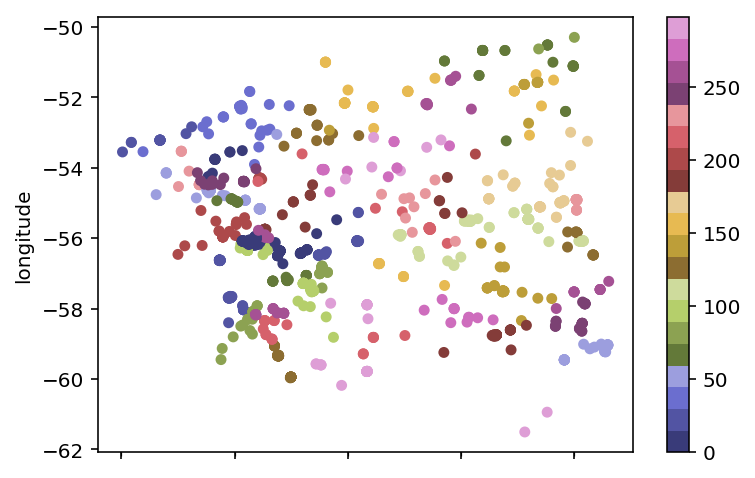

In [17]:
ax1 = locais.plot.scatter(x='latitude',
                      y='longitude',
                      c=grupos,
                      colormap='tab20b')

In [12]:
locais['GRUPOS'] = grupos

In [13]:
locais[:5]

,longitude,latitude,COD_LOCALIDADE_TSE,NOM_LOCALIDADE_1,NOM_BAIRRO,NUM_LOCAL,NOM_LOCAL,DES_ENDERECO,CODIGO,LQTD_SECOES,LQTD_APTOS,INDIGENAS,GRUPOS
0,-56.104889,-15.589418,90670,CUIABÁ,QUILOMBO,2593,COLÉGIO MAXI,"RUA ESTEVÃO DE MENDONÇA, 1000",1906702593,16,6309,0,0
1,-56.098308,-15.592559,90670,CUIABÁ,CENTRO,1015,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...","RUA ZULMIRA CANAVARROS, 95",1906701015,24,4916,0,0
2,-56.081131,-15.579708,90670,CUIABÁ,ALVORADA,2488,ESCOLA MUNICIPAL CÂNDIDO MARIANO DA SILVA RONDON,"RUA PIRATININGA, 101",1906702488,12,4571,0,0
3,-56.113951,-15.613200,90670,CUIABÁ,PORTO,2844,ESCOLA ESTADUAL JOSÉ BARNABÉ DE MESQUITA,"RUA BARÃO DE MELGACO, 945",1906702844,13,4471,0,0
4,-56.128743,-15.618736,90670,CUIABÁ,COOPHAMIL,2810,ESCOLA MUNICIPAL DE EDUCAÇÃO BÁSICA PROFESSOR ...,"RUA JOÃO PAULO DOS SANTOS, S/N",1906702810,12,4308,0,0


In [14]:
res1 = pd.ExcelWriter('res1.xlsx')
locais.to_excel(res1,'dados',index=False)
res1.save()